In [1]:
# Comenzamos con los imports iniciales

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from data_gen import * # Codigos del trabajo anterior
from matplotlib import pyplot as mpl
from csv import reader
from sklearn import tree
import graphviz

In [6]:
# Elementos basicos para ejecutar el primer ejercicio
def espirales_entrenados(n, test_case):
    case = generar_espirales(n)
    clf = entrenar(case)
    case_clasificado = clasificar(test_case, clf)
    return case_clasificado


def entrenar(case):
    X_train, y_train = case.iloc[:, :-1], case.iloc[:, -1:]
    clf = DecisionTreeClassifier(
        criterion="entropy",
        min_impurity_decrease=0.005,
        random_state=0,
        min_samples_leaf=5,
    )
    clf.fit(X_train, y_train)
    return clf


def clasificar(test_case, clf):
    X_test = test_case.iloc[:, :-1]
    clasificacion = clf.predict(X_test)
    results = X_test
    results["Class"] = clasificacion
    return results

# Ejercicio 1

In [5]:
def ejercicio_1():
    test_case = generar_espirales(10000)
    plot(test_case, "Test original")
    plot(espirales_entrenados(150, test_case), "Caso con 150")
    plot(espirales_entrenados(600, test_case), "Caso con 600")
    plot(espirales_entrenados(3000, test_case), "Caso con 3000")

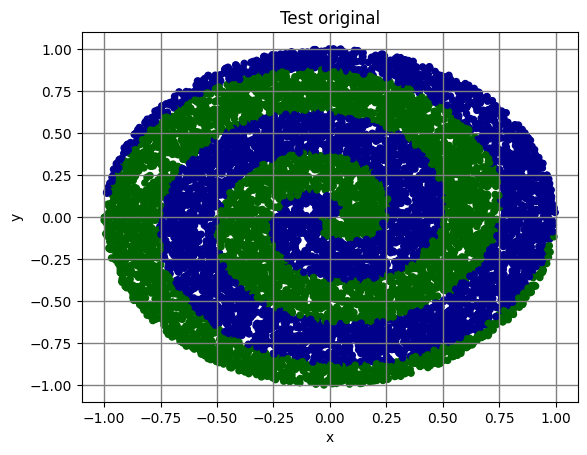

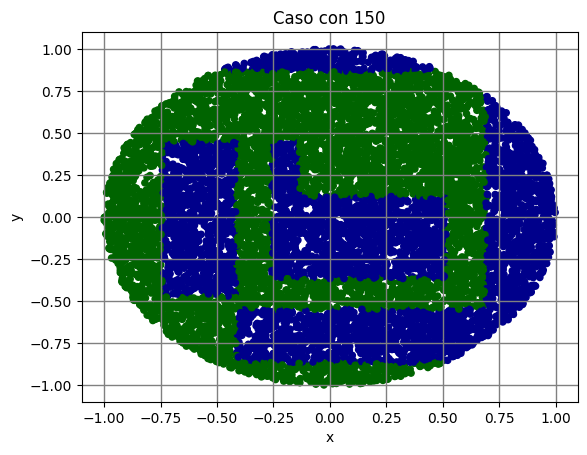

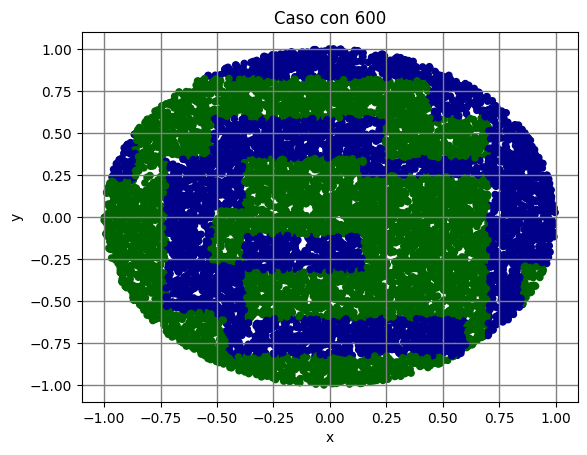

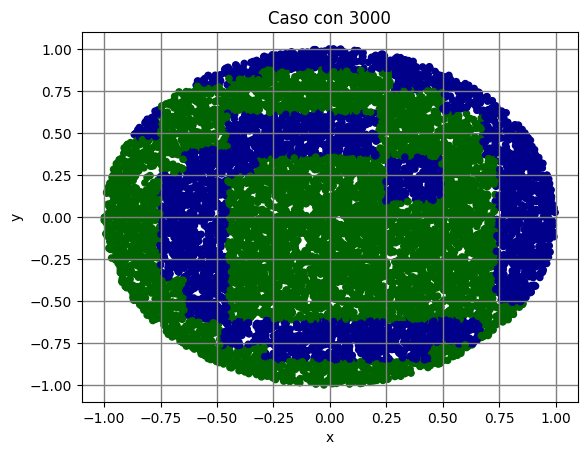

In [6]:
ejercicio_1()

## Conclusiones Ejercicio 1

Como podemos observar, a medida que la cantidad de casos aumenta nos vamos acercando a una resolución mejor de los espirales. Sin embargo, es posible notar que la solución se genera en forma de cuadrantes, es decir, va realizando rectas horizontales y verticales para recortar el espacio de la esfera. 
En otras palabras, más casos nos acercarían a una solución, pero requeriríamos una cantidad abismal de casos para suavizar las curvas de las esferas. 
Sería mejor utilizar otro tipo de herramienta para este problema

# Ejercicio 2

In [11]:
# Funciones necesarias para el ejercicio 2
def clasifico_y_errores(values, test_case):
    clf = entrenar(values)

    values_clasificados_test = clasificar(test_case, clf)
    values_clasificados_training = clasificar(values, clf)

    class_clasificados_test = values_clasificados_test.iloc[:, -1:]
    class_test = test_case.iloc[:, -1:]

    class_clasificados_training = values_clasificados_training.iloc[:, -1:]
    class_values = values.iloc[:, -1:]

    results_training_test = class_clasificados_test.transpose().values.tolist()[0]
    results_real_test = class_test.transpose().values.tolist()[0]

    results_training_values = class_clasificados_training.transpose().values.tolist()[0]
    results_real_values = class_values.transpose().values.tolist()[0]

    test_accuracy = accuracy_score(results_training_test, results_real_test)
    values_accuracy = accuracy_score(results_training_values, results_real_values)

    return (1 - test_accuracy, 1 - values_accuracy, clf.tree_.node_count)


def plot_error_lines(results, labels, sizes):
    colors = ["red", "red", "blue", "blue", "green", "green"]
    line = ["-", "-", "-", "-", "-", "-"]
    markers = ["o", "v", "o", "v", "o", "v"]

    for i in range(len(results)):
        mpl.plot(
            sizes,
            results[i],
            color=colors[i],
            label=labels[i],
            linestyle=line[i],
            marker=markers[i],
        )

    mpl.xlabel("Sizes")
    mpl.ylabel("Error")
    mpl.legend()

    mpl.show()


def plot_tree_sizes(nodes, labels, sizes):
    colors = ["red", "blue"]
    line = ["-", "-"]
    markers = ["o", "o"]

    for i in range(len(nodes)):
        mpl.plot(
            sizes,
            nodes[i],
            color=colors[i],
            label=labels[i],
            linestyle=line[i],
            marker=markers[i],
        )

    mpl.xlabel("Sizes")
    mpl.ylabel("Size of Tree")
    mpl.legend()

    mpl.show()

In [11]:
# Ejercicio 2
def ejercicio_2():
    sizes = [125, 250, 500, 1000, 2000, 4000]
    accuracy_results_parallel_on_test = []
    accuracy_results_parallel_on_training = []
    accuracy_results_diagonal_on_test = []
    accuracy_results_diagonal_on_training = []
    accuracy_results = []
    node_sizes_parallel = []
    node_sizes_diagonal = []
    node_sizes = []
    labels = []

    c = 0.78
    d = 2
    centros_a = centros_eja(d)
    centros_b = centros_ejb(d)

    test_error_total = 0.0
    values_error_total = 0.0

    test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
    test_case_b = generar_valores(centros_b, c, d, 10000)

    for i in range(len(sizes)):
        node_totals = 0

        for j in range(20):
            n = sizes[i]
            values = generar_valores(centros_a, c * sqrt(d), d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_a)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals_parallel = node_totals / 20

        accuracy_results_parallel_on_test.append(test_error_total)
        accuracy_results_parallel_on_training.append(values_error_total)
        node_sizes_parallel.append(node_totals_parallel)

    labels.append("Diagonal_on_test")
    labels.append("Diagonal_on_training")

    accuracy_results.append(accuracy_results_parallel_on_test)
    accuracy_results.append(accuracy_results_parallel_on_training)

    for i in range(len(sizes)):
        node_totals = 0

        for j in range(20):
            n = sizes[i]
            values = generar_valores(centros_b, c, d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_b)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals = node_totals / 20

        accuracy_results_diagonal_on_test.append(test_error_total)
        accuracy_results_diagonal_on_training.append(values_error_total)
        node_sizes_diagonal.append(node_totals)

    accuracy_results.append(accuracy_results_diagonal_on_test)
    labels.append("Parallel_on_test")
    accuracy_results.append(accuracy_results_diagonal_on_training)
    labels.append("Parallel_on_training")
    node_sizes.append(node_sizes_parallel)
    node_sizes.append(node_sizes_diagonal)

    plot_error_lines(accuracy_results, labels, sizes)
    plot_tree_sizes(node_sizes, ["Diagonal_tree_size", "Parallel_tree_size"], sizes)

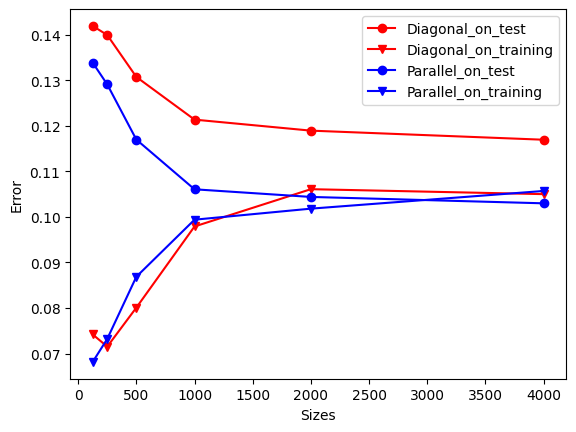

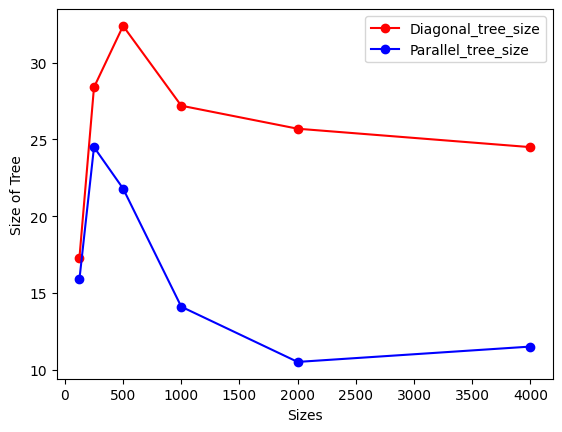

In [12]:
ejercicio_2()

## Conclusiones Ejercicio 2

Como era esperable el error en training aumenta con el aumento de los tamaños de los datasets, pero parecería converger, para ambos casos, a aproximadamente 0.11. 
La cantidad de nodos resulta ser mayor para el caso diagonal la cantidad de nodos resulta considerablemente mayor a el caso paralelo. Esto probablemente se debe a que el caso diagonal justamente resulta dificil de reproducir para un árbol de decision, de forma parecida a las curvas de las esferas del ejercicio anterior. 
Por alguna razón, la cantidad de nodos para el caso más pequeño es mayor, probablemente se debe a que el árbol realiza una poda de nodos más eficiente para casos más grandes.

# Ejercicio 3 y 3_1

In [9]:
def clasificador_dist_centro(centros, test_case):
    clasificacion = []
    results_real_values = test_case.iloc[:, -1:].transpose().values.tolist()[0]
    test_points = test_case.iloc[:, :-1].values

    for v in test_points:  # Re-trasponer.
        dist_centro_0 = dist(v, centros[0])
        dist_centro_1 = dist(v, centros[1])
        if dist_centro_0 >= dist_centro_1:
            clasificacion.append(0)
        else:
            clasificacion.append(1)

    test_accuracy = accuracy_score(clasificacion, results_real_values)

    return test_accuracy


def ejercicio_3_1():
    c_values = [0.5, 1.0, 1.5, 2.0, 2.5]
    accuracy_results_parallel_on_test = []
    accuracy_results_diagonal_on_test = []
    accuracy_results = []
    labels = []

    n = 250
    d = 5
    centros_a = centros_eja(d)
    centros_b = centros_ejb(d)

    test_error_total = 0.0

    for c in c_values:
        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)

        for j in range(20):
            (test_error) = clasificador_dist_centro(centros_a, test_case_a)
            test_error_total += test_error

        test_error_total = test_error_total / 20

        accuracy_results_parallel_on_test.append(test_error_total)

    labels.append("Ideal_Diagonal_on_test")

    accuracy_results.append(accuracy_results_parallel_on_test)

    for c in c_values:
        test_case_b = generar_valores(centros_b, c, d, 10000)

        for j in range(20):
            (test_error) = clasificador_dist_centro(centros_b, test_case_b)
            test_error_total += test_error

        test_error_total = test_error_total / 20

        accuracy_results_diagonal_on_test.append(test_error_total)

    accuracy_results.append(accuracy_results_diagonal_on_test)
    labels.append("Ideal_Parallel_on_test")

    #plot_error_lines(accuracy_results, labels, c_values)
    return accuracy_results, labels


def ejercicio_3():
    c_values = [0.5, 1.0, 1.5, 2.0, 2.5]
    accuracy_results_parallel_on_test = []
    accuracy_results_parallel_on_training = []
    accuracy_results_diagonal_on_test = []
    accuracy_results_diagonal_on_training = []
    accuracy_results = []
    node_sizes_parallel = []
    node_sizes_diagonal = []
    node_sizes = []
    labels = []

    n = 250
    d = 5
    centros_a = centros_eja(d)
    centros_b = centros_ejb(d)

    test_error_total = 0.0
    values_error_total = 0.0

    for c in c_values:
        node_totals = 0

        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
        test_case_b = generar_valores(centros_b, c, d, 10000)

        for j in range(20):
            values = generar_valores(centros_a, c * sqrt(d), d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_a)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals_parallel = node_totals / 20

        accuracy_results_parallel_on_test.append(test_error_total)
        accuracy_results_parallel_on_training.append(values_error_total)
        node_sizes_parallel.append(node_totals_parallel)

    labels.append("Diagonal_on_test")
    labels.append("Diagonal_on_training")

    accuracy_results.append(accuracy_results_parallel_on_test)
    accuracy_results.append(accuracy_results_parallel_on_training)

    for c in c_values:
        node_totals = 0

        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
        test_case_b = generar_valores(centros_b, c, d, 10000)

        for j in range(20):
            values = generar_valores(centros_b, c, d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_b)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals = node_totals / 20

        accuracy_results_diagonal_on_test.append(test_error_total)
        accuracy_results_diagonal_on_training.append(values_error_total)
        node_sizes_diagonal.append(node_totals)

    accuracy_results.append(accuracy_results_diagonal_on_test)
    labels.append("Parallel_on_test")
    accuracy_results.append(accuracy_results_diagonal_on_training)
    labels.append("Parallel_on_training")
    node_sizes.append(node_sizes_parallel)
    node_sizes.append(node_sizes_diagonal)

    ideal_results, ideal_labels = ejercicio_3_1()

    plot_error_lines(accuracy_results+ideal_results, labels+ideal_labels, c_values)
    plot_tree_sizes(node_sizes, ["Diagonal_tree_size", "Parallel_tree_size"], c_values)

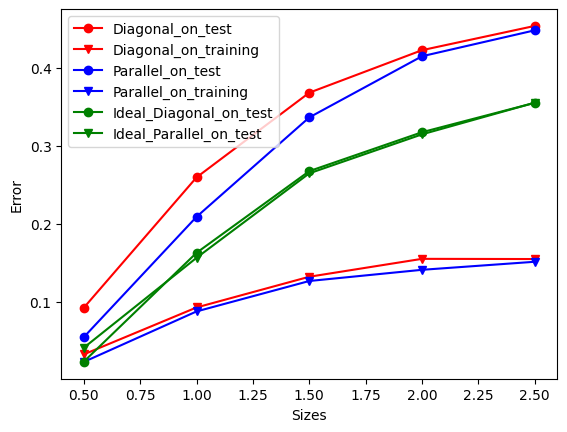

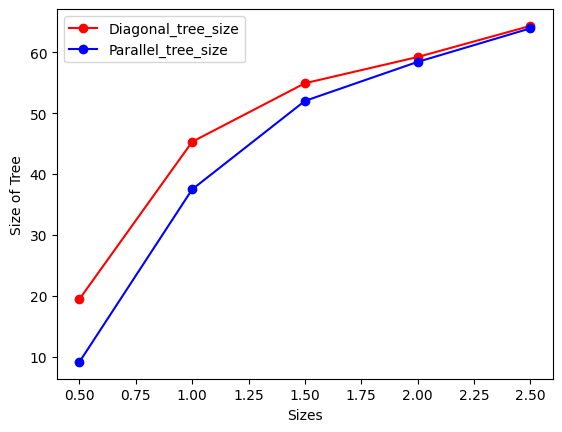

In [12]:
ejercicio_3()

## Conclusiones Ejercicio 3 + Ejercicio 3_1

A diferencia del ejercicio anterior, vemos que al introducir más ruido tanto el error como la cantidad de nodos crece considerablemente al aumentar el ruido (es decir el valor de C).
Sin embargo, también vemos que el valor "ideal" de clasificador, es decir medir la distancia al centro en cuestión, también crece, así que podemos concluir que en general la distancia del error en test se mantiene más o menos constante al clasificador ideal, pero el error en training se aleja, es decir, no cambia tanto a medida que crece el ruido. De hecho converge a un valor similar al ejercicio anterior, es decir, no cambia tanto al introducir más ruido al problema, que si sucede con los tests

# Ejercicio 4

In [13]:
def ejercicio_4():
    d_values = [2, 4, 8, 16, 32]
    accuracy_results_parallel_on_test = []
    accuracy_results_parallel_on_training = []
    accuracy_results_diagonal_on_test = []
    accuracy_results_diagonal_on_training = []
    accuracy_results = []
    node_sizes_parallel = []
    node_sizes_diagonal = []
    node_sizes = []
    labels = []

    n = 250
    c = 5

    test_error_total = 0.0
    values_error_total = 0.0
    node_totals = 0.0

    for d in d_values:
        node_totals = 0

        centros_a = centros_eja(d)
        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)

        for j in range(20):
            values = generar_valores(centros_a, c * sqrt(d), d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_a)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals_parallel = node_totals / 20

        accuracy_results_parallel_on_test.append(test_error_total)
        accuracy_results_parallel_on_training.append(values_error_total)
        node_sizes_parallel.append(node_totals_parallel)

    labels.append("Diagonal_on_test")
    labels.append("Diagonal_on_training")

    accuracy_results.append(accuracy_results_parallel_on_test)
    accuracy_results.append(accuracy_results_parallel_on_training)

    for d in d_values:
        centros_b = centros_ejb(d)
        test_case_b = generar_valores(centros_b, c, d, 10000)

        for j in range(20):
            values = generar_valores(centros_b, c, d, n)
            (test_error, values_error, nodes) = clasifico_y_errores(values, test_case_b)
            node_totals += nodes
            test_error_total += test_error
            values_error_total += values_error

        test_error_total = test_error_total / 20
        values_error_total = values_error_total / 20
        node_totals = node_totals / 20

        accuracy_results_diagonal_on_test.append(test_error_total)
        accuracy_results_diagonal_on_training.append(values_error_total)
        node_sizes_diagonal.append(node_totals)

    accuracy_results.append(accuracy_results_diagonal_on_test)
    labels.append("Parallel_on_test")
    accuracy_results.append(accuracy_results_diagonal_on_training)
    labels.append("Parallel_on_training")
    node_sizes.append(node_sizes_parallel)
    node_sizes.append(node_sizes_diagonal)

    plot_error_lines(accuracy_results, labels, d_values)
    plot_tree_sizes(node_sizes, ["Diagonal_tree_size", "Parallel_tree_size"], d_values)

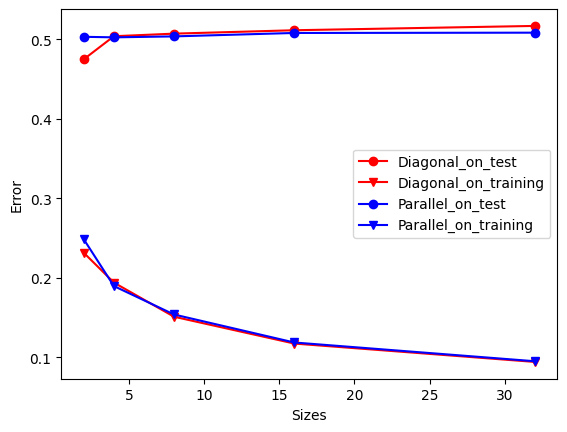

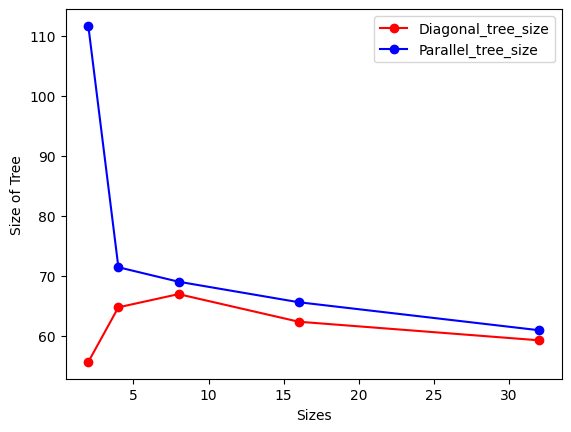

In [14]:
ejercicio_4()

## Conclusiones Ejercicio 4

A diferencia de los casos anteriores, si bien el error en training también converge a algo similar, el error en test se mantuvo constante en aproximadamente 0.5. Fue un resultado extraño y no estoy del todo seguro por qué sucede. Pero por los resultados podemos concluir que no funcionó bien para este caso. Un clasificador con error en test de 0.5 es casi aleatorio, así que el clasificador pierde efectividad en este problema de dimensionalidad. 
Sorpresivamente no empeora tampoco al aumentar el valor.

En el caso de la cantidad de nodos, vemos un caso similar al ejercicio 2, donde la cantidad de nodos pega un salto para el caso más pequeño. Probablemente se deba a que al aumentar el valor de d puede hacer una mejor poda

# Ejercicio 5

In [15]:
def entrenar_xor(case):
    X_train, y_train = case.iloc[:, :-1], case.iloc[:, -1:]
    clf = DecisionTreeClassifier(
        criterion="entropy",
        min_impurity_decrease=0.03,
        random_state=0,
        min_samples_leaf=5,
    )
    clf.fit(X_train, y_train)
    return clf


def ejercicio_5():
    with open("xor.csv") as csvfile:
        lines = reader(csvfile)
        dataframe = pd.DataFrame(lines)

    clf = entrenar_xor(dataframe)
    case_clasificado = clasificar(dataframe, clf)
    score_clf = case_clasificado.iloc[:, -1:]
    score_real = dataframe[2]
    tree.plot_tree(clf)
    dot_data = tree.export_graphviz(clf, out_file=None)
    graph = graphviz.Source(dot_data)
    graph.render("ejercicio5")
    print(accuracy_score(score_clf, score_real))

# Primeras conclusiones del ejercicio 5

Antes de ejecutar el código, analizando el problema podemos ver que con 2 rectas podemos resolver el ejercicio, es decir, clasificar en base a si X>0 e Y>0 o X<=0 e Y<=0 bastaría para determinar si un punto pertenece a una clase o la otra (con la arbitrariedad de elegir para qué lado pertenece el cero). 
Sin embargo, es un problema conocido que es imposible de resolver por el árbol en cuestión

In [22]:
ejercicio_5()

0.5


## Conclusiones ejercicio 5

La accuracy del árbol resulta 0.5, que es inutil para analizar este problema, pues es completamente aleatorio.
Analizando el árbol (como se puede ver a continuación), nos da un único nodo de entropía 1, lo cual nos termina de mostrar que no sirve para analizar un problema como este, del tipo "no linear". 

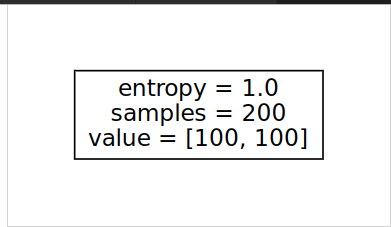